In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading the dataset
print("Loading the Dataset...")
dataset = load_dataset("lukebarousse/data_jobs")
print("Dataset Loaded Successfully...")

#converting dataset to a data frame
df = dataset["train"].to_pandas()
print("Data Frame Created...")

############ Cleaning
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df.drop(["salary_hour_avg"], axis=1, inplace=True)
df = df[df["job_title_short"].notna()]
df = df[df["salary_year_avg"].notna()]
df["joining_month"] = df["job_posted_date"].dt.month
print("Data Cleaned...")

c:\Users\ADMIN\anaconda3\envs\pandas_prac_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading the Dataset...
Dataset Loaded Successfully...
Data Frame Created...
Data Cleaned...


Text(0, 0.5, 'Median Salaries')

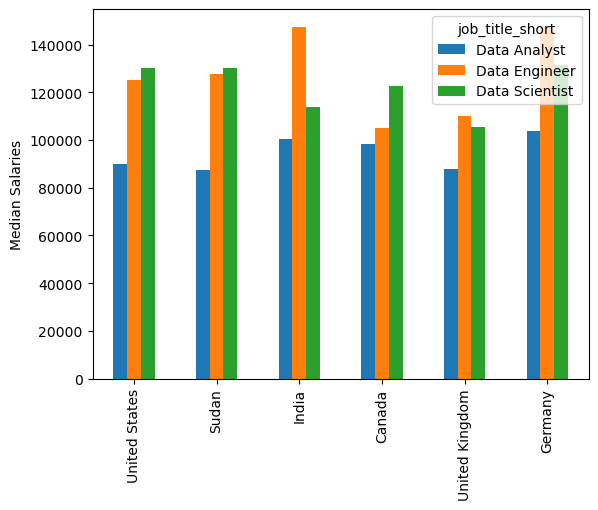

In [24]:
pivot_table = df.pivot_table(index='job_country', columns='job_title_short', values='salary_year_avg' ,aggfunc='median')
# getting only top 6 countries based on value counts
job_country_count = df["job_country"].value_counts().head(6)
top_countries = job_country_count.index
top_countries
# From the pivot table, we only need those countries which are in top_countries
pivot_table = pivot_table.loc[top_countries]

# Now, let us only select Data Analyst, Data Engineer, Data Scientist roles as columns leaving all other columns
required_roles = ["Data Analyst", "Data Engineer", "Data Scientist"]
pivot_table = pivot_table[required_roles]

# Once we have our required pivot table, we can plot the graph using pandas
pivot_table.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Median Salaries")


In [19]:
pivot_table

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.00,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
Sudan,82665.0,70415.25,87500.0,127500.0,130000.0,165659.0,111175.0,147500.0,155000.0,100000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
Canada,85000.0,130000.00,98500.0,105000.0,122500.0,149653.0,111175.0,125000.0,130000.0,125000.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
Germany,89100.0,89100.00,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
